# Home assignment #1. Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from filterpy.stats import plot_covariance_ellipse

In [2]:
def filter(x, E): #В python есть встроенная функция filter, лучше переименовать
    x_list = []
    E_list = []
    k_list = []
    
    for Z in measurements:
        # prediction
        x = (F * x) + u
        E = F * E * F.transpose()

        # measurement update
        Z = np.matrix(Z)
        S = H * E * H.transpose() + R
        K = E * H.transpose() * np.linalg.inv(S)
        x = x + (K * (Z.transpose() - (H * x)))
        E = (I - (K * H)) * E
        
        x_list.append(x)
        E_list.append(E)
        k_list.append(K)
        
        print("x= ")
        print(x)
        print("E= ")
        print(E)
        
    return x_list, E_list, k_list

def plot_position_xy(x, E, edgecolor='r'):
    xy= np.array([x[0, 0],x[1, 0]])
    E_xy= np.array([[E[0, 0],E[0, 1]],[E[1, 0],E[1, 1]]])
    plot_covariance_ellipse(xy, E_xy, edgecolor=edgecolor)

def plot_position_velocity(x, E, edgecolor='r'):
    xy= np.array([x[2, 0],x[3, 0]])
    E_xy= np.array([[E[2, 2],E[2, 3]],[E[3, 2],E[3, 3]]])
    plot_covariance_ellipse(xy, E_xy, edgecolor=edgecolor)    
    

def plot_position_xy_and_velocity(x, E, x_list, E_list):
    gridsize = (1, 2)
    fig = plt.figure(figsize=(16, 8))
    
    plt.subplot2grid(gridsize, (0, 0))
    plt.title("Изменение координат со временем с дисперсией")
    plt.xlabel("x")
    plt.ylabel("y")
    plot_position_xy(x, E)
    for i in range(len(x_list)):
        plot_position_xy(x_list[i], E_list[i], edgecolor='g')
        
    plt.subplot2grid(gridsize, (0, 1))
    plt.title("Изменение скорости со временем с дисперсией")
    plt.xlabel("Vx")
    plt.ylabel("Vy")
    plot_position_velocity(x, E)
    for i in range(len(x_list)):
        plot_position_velocity(x_list[i], E_list[i], edgecolor='g')

def plot_components_k(k_list):        
    gridsize = k_list[0].shape
    fig = plt.figure(figsize=(6 * k_list[0].shape[1], 6 * k_list[0].shape[0]))
    
    for i in range(k_list[0].shape[0]):
        for j in range(k_list[0].shape[1]):
            plt.subplot2grid(gridsize, (i, j))
            plt.title("k[" + str(i) + "][" + str(j) + "]")
            plt.xlabel("Время")
            plt.ylabel("Значение компоненты")
            plt.plot(np.array(k_list)[:,i, j], color="b")
        

In [3]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.matrix([
    [0., 0., 0., 0.],
    [0., 0., 0., 0.],
    [0., 0., 1000., 0.],
    [0., 0., 0., 1000.]
])

# next state function: 4D
F = np.matrix([
    [1., 0., dt, 0.], 
    [0., 1., 0., dt],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.]
])

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.matrix([
    [1., 0., 0., 0.],
    [0., 1., 0., 0.]
])
#R = # measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.matrix([
    [0.1, 0.],
    [0., 0.1]
])

#I = # 4D identity matrix
I = np.matrix([
    [1., 0., 0., 0.], 
    [0., 1., 0., 0.],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.]
])


In [4]:
print("### First Experiment ###")
measurements = [
    [5.0, 10.0], 
    [6.0, 8.0], 
    [7.0, 6.0], 
    [8.0, 4.0], 
    [9.0, 2.0], 
    [10.0, 0.0]
]

initial_xy = [4.0, 12.0]

# initial robot state (location and velocity)
x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])

# external motion applied to the robot
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])

### First Experiment ###


In [5]:
x_list, E_list, k_list = filter(x, E)

x= 
[[  4.99009901]
 [ 10.02079208]
 [  9.9009901 ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  5.99600798]
 [  8.00838323]
 [  9.98003992]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  6.99785867]
 [  6.00449679]
 [  9.99286224]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  7.99866711]
 [  4.00279907]
 [  9.99666778]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

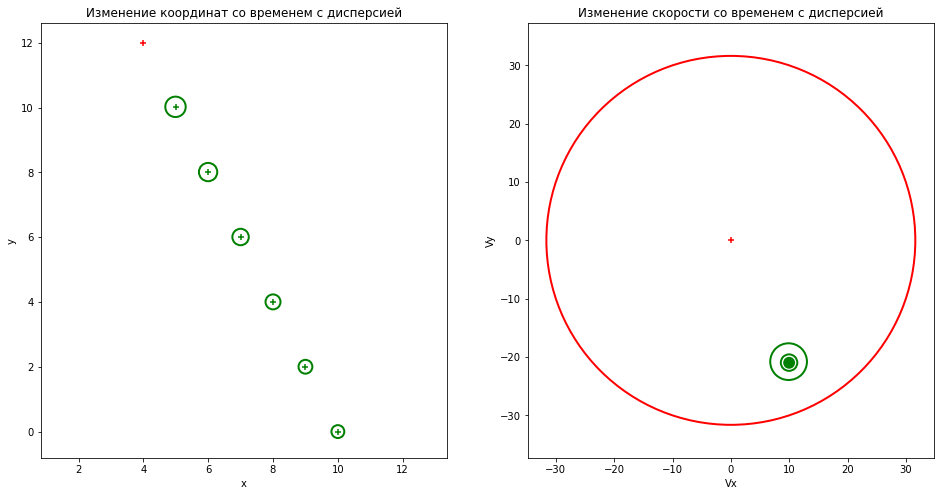

In [6]:
# YOUR CODE HERE
plot_position_xy_and_velocity(x, E, x_list, E_list)

Visualize the components of the $ K $ matrix below

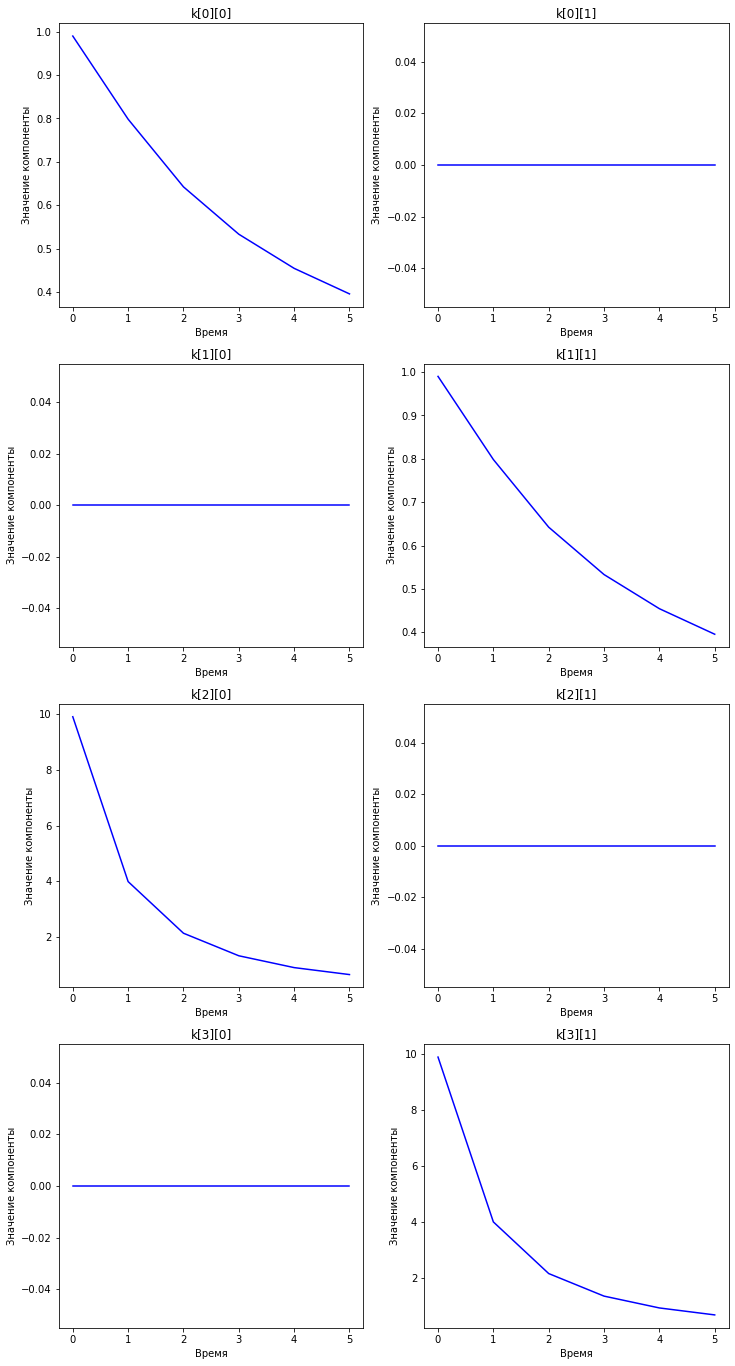

In [7]:
# YOUR CODE HERE
plot_components_k(k_list)

In [8]:
print("### Second Experiment ###")
measurements = [
    [1.0, 4.0],
    [6.0, 0.0], 
    [11.0, -4.0], 
    [16.0, -8.0]
]

initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])

### Second Experiment ###


In [9]:
x_list, E_list, k_list = filter(x, E)

x= 
[[  0.95049505]
 [  4.04059406]
 [ 49.5049505 ]
 [-40.59405941]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[ 5.98003992e+00]
 [ 1.63672655e-02]
 [ 4.99001996e+01]
 [-4.09181637e+01]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[ 10.98929336]
 [ -3.99122056]
 [ 49.96431121]
 [-40.97073519]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[ 15.99333555]
 [ -7.99453515]
 [ 49.98333889]
 [-40.98633789]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

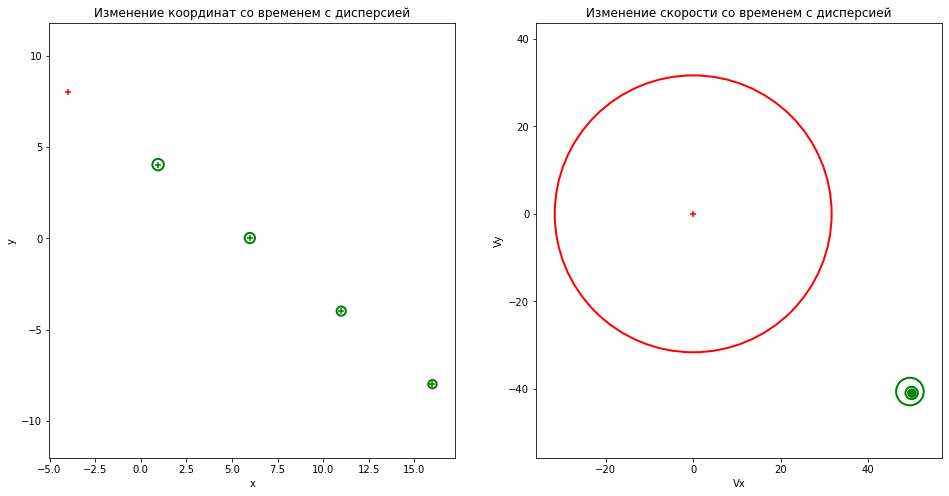

In [10]:
# YOUR CODE HERE
plot_position_xy_and_velocity(x, E, x_list, E_list)

Visualize the components of the $ K $ matrix below

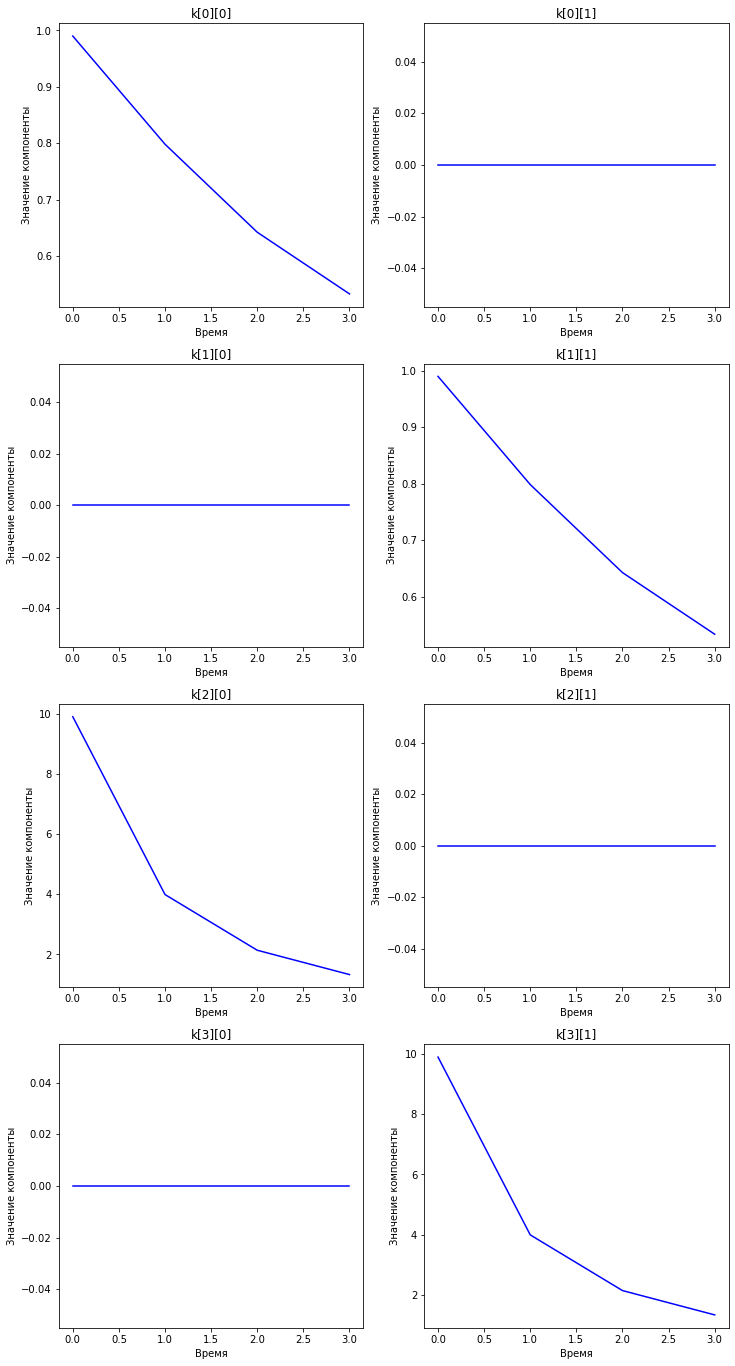

In [11]:
# YOUR CODE HERE
plot_components_k(k_list)

In [12]:
print("### Third Experiment ###")
measurements = [
    [1.0, 17.0], 
    [1.0, 15.0], 
    [1.0, 13.0], 
    [1.0, 11.0]
]

initial_xy = [1.0, 19.0]

dt = 0.1
# initial robot state (location and velocity)
x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])  
# external motion applied to the robot
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])  

### Third Experiment ###


In [13]:
x_list, E_list, k_list = filter(x, E)

x= 
[[  1.        ]
 [ 17.02079208]
 [  0.        ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  1.        ]
 [ 15.00838323]
 [  0.        ]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  1.        ]
 [ 13.00449679]
 [  0.        ]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  1.        ]
 [ 11.00279907]
 [  0.        ]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

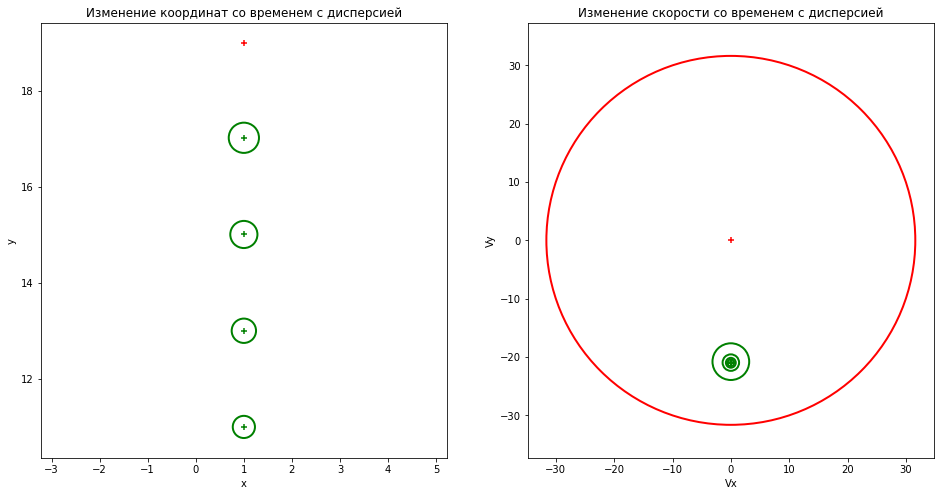

In [14]:
# YOUR CODE HERE
plot_position_xy_and_velocity(x, E, x_list, E_list)

Visualize the components of the $ K $ matrix below

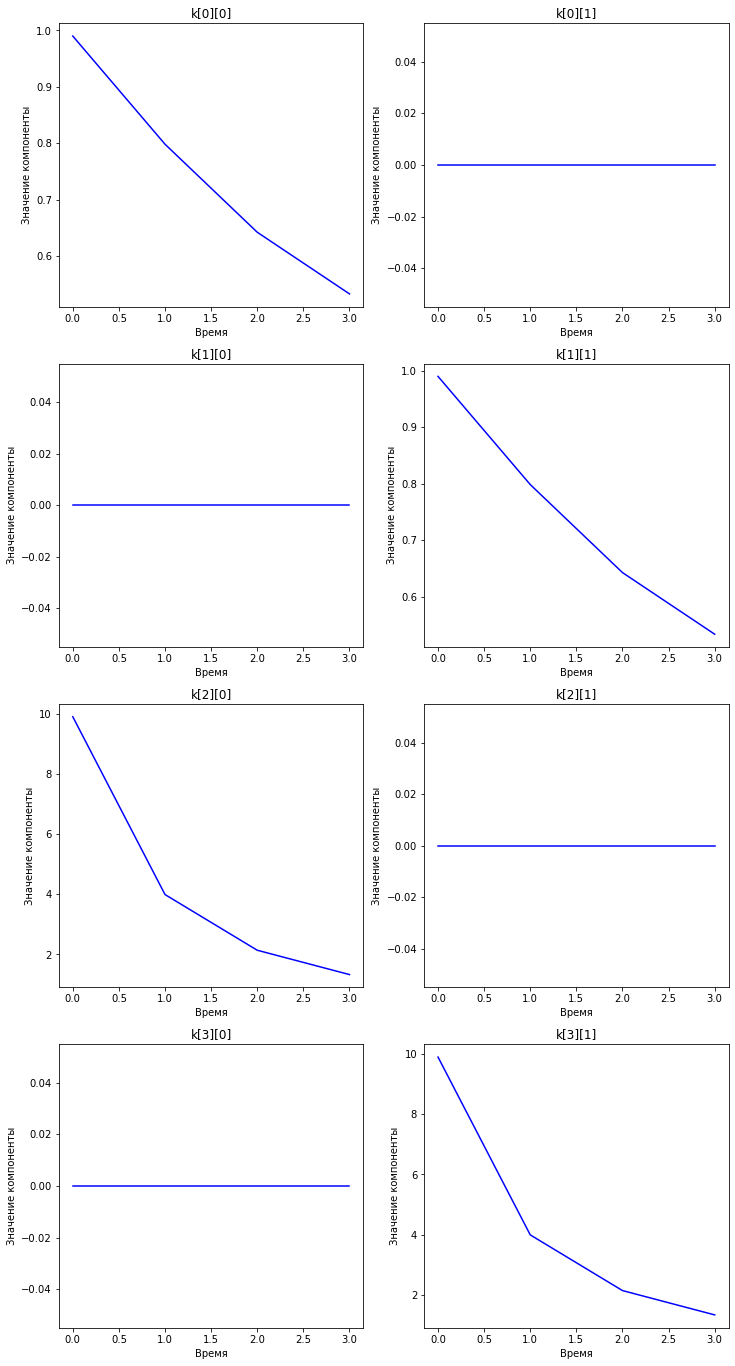

In [15]:
# YOUR CODE HERE
plot_components_k(k_list)

In [16]:
print("### Fourth Experiment ###")
measurements = []

for x in range(1, 30, 1):
    measurements.append([x*0.5, np.sin(x*0.5)])
initial_xy = [0.0, 0.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])  
# external motion applied to the robot
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])  

### Fourth Experiment ###


In [17]:
x_list, E_list, k_list = filter(x, E)

x= 
[[0.4950495 ]
 [0.47566885]
 [4.95049505]
 [3.7566885 ]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[0.99800399]
 [0.86361976]
 [4.99001996]
 [3.31809882]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[1.49892934]
 [1.10403693]
 [4.99643112]
 [2.6801231 ]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[1.99933356]
 [1.17201495]
 [4.99833389]
 [1.93003738]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.      

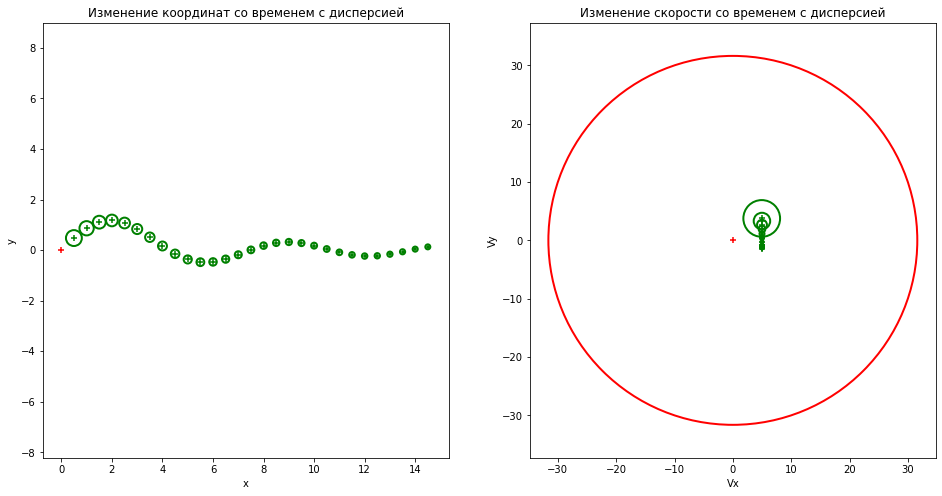

In [18]:
plot_position_xy_and_velocity(x, E, x_list, E_list)

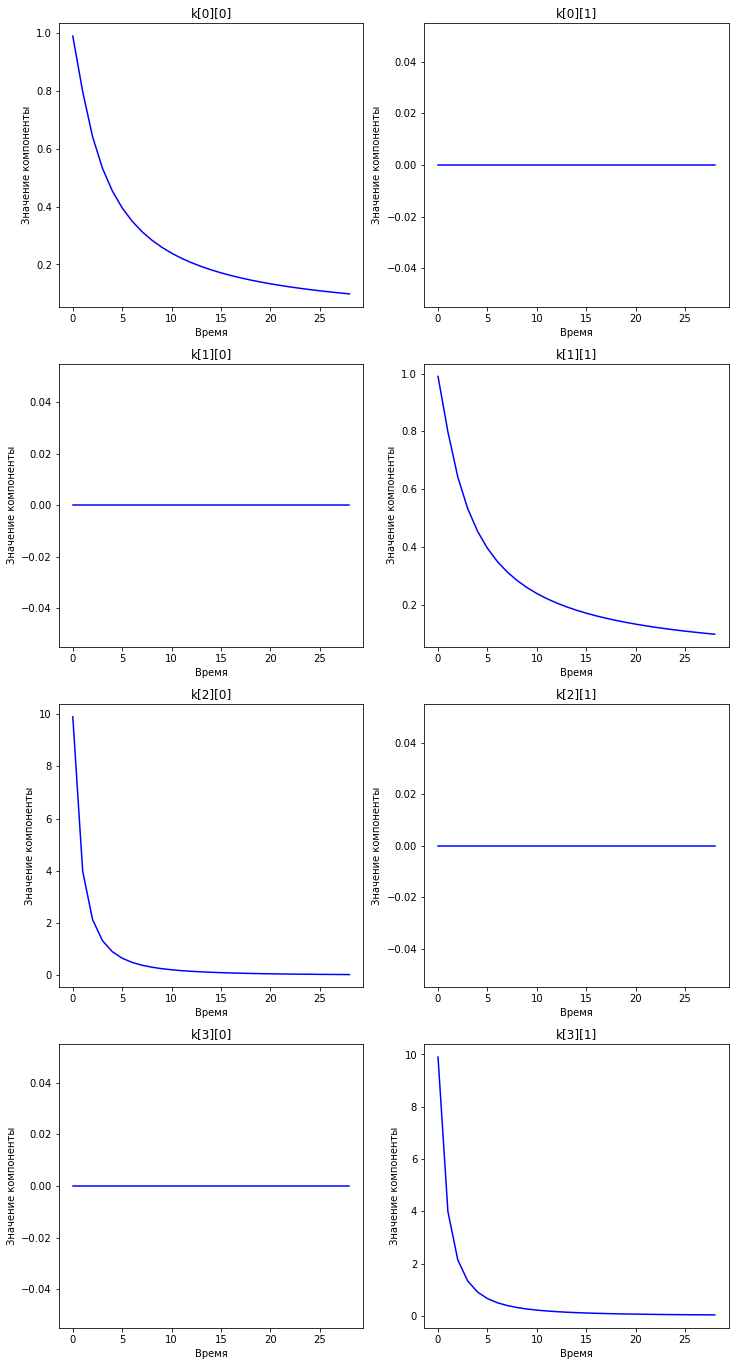

In [19]:
plot_components_k(k_list)

In [20]:
print("### Fifth Experiment ###")
measurements = []

for alpha in range(1, 31, 1):
    alpha *= np.pi / 30
    measurements.append([np.cos(alpha), np.sin(alpha)])
initial_xy = [1.0, 0.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])  
# external motion applied to the robot
u = np.matrix([[0.0], [0.1], [0.0], [0.0]])   

### Fifth Experiment ###


In [21]:
x_list, E_list, k_list = filter(x, E)

x= 
[[ 0.99457613]
 [ 0.10448363]
 [-0.05423866]
 [ 0.04483627]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[ 0.98036611]
 [ 0.20812449]
 [-0.09816947]
 [ 0.04062244]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[ 0.95802712]
 [ 0.3101505 ]
 [-0.1399096 ]
 [ 0.033835  ]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[ 0.92777987]
 [ 0.40990995]
 [-0.18055032]
 [ 0.02477488]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1

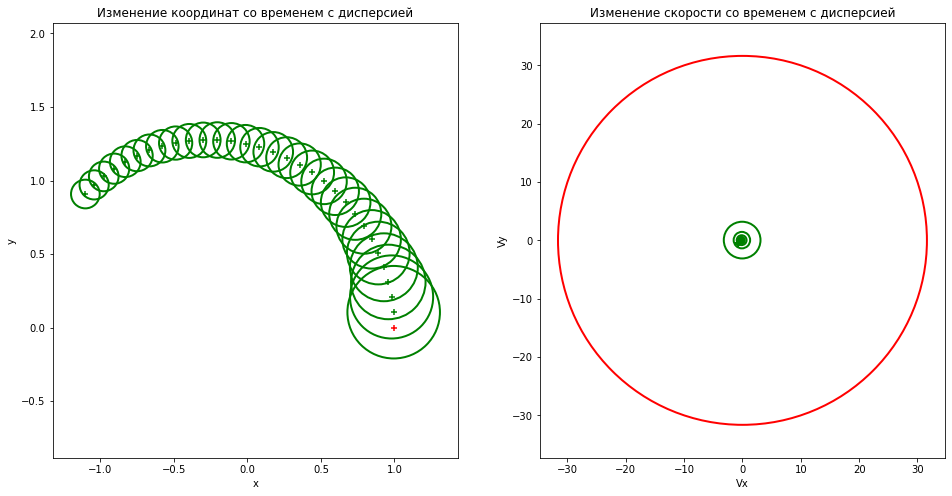

In [22]:
plot_position_xy_and_velocity(x, E, x_list, E_list)

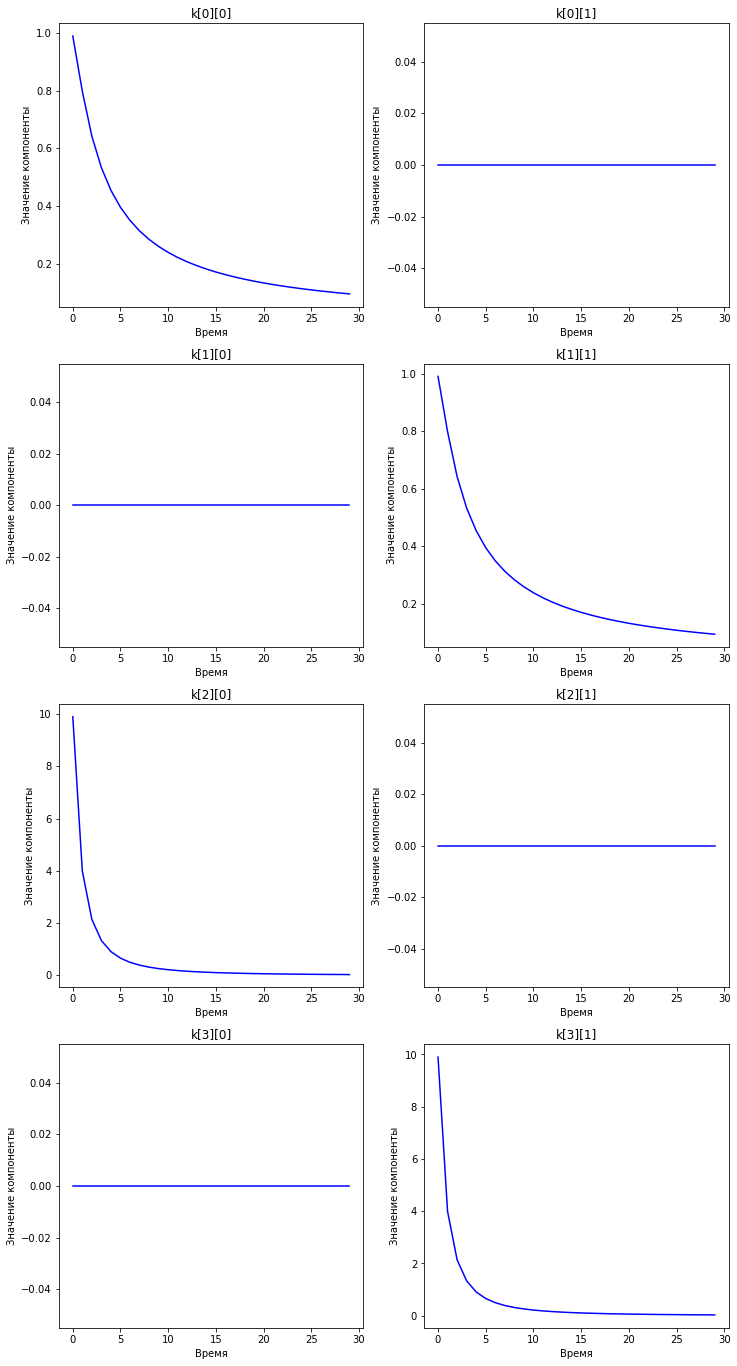

In [23]:
plot_components_k(k_list)

#### Компоненты уменьшаются, похоже экспоненциально, неопределенность уменьшается. Скорость стремиться к константе. Так же уменьшается дисперсия. 

#### Для равномерного прямолинейного движения результаты хорошие. 

#### В случае неравномерного движения (предпоследний эксперимент) так же все затухает, поэтому контролировать скорость невозможно

#### В случае равномерного непрямолинейного  (последний эксперимент) так же все затухает, поэтому контролировать угол вектора скорости невозможно, т.е. I закон Ньютона все таки не раотает для этой модели